In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image,label in dataset.take(1):
    c=0
    for i in label.numpy():
          if i==2:
              c=c+1
    print(c)              
    
   # print(image.numpy())
 

1


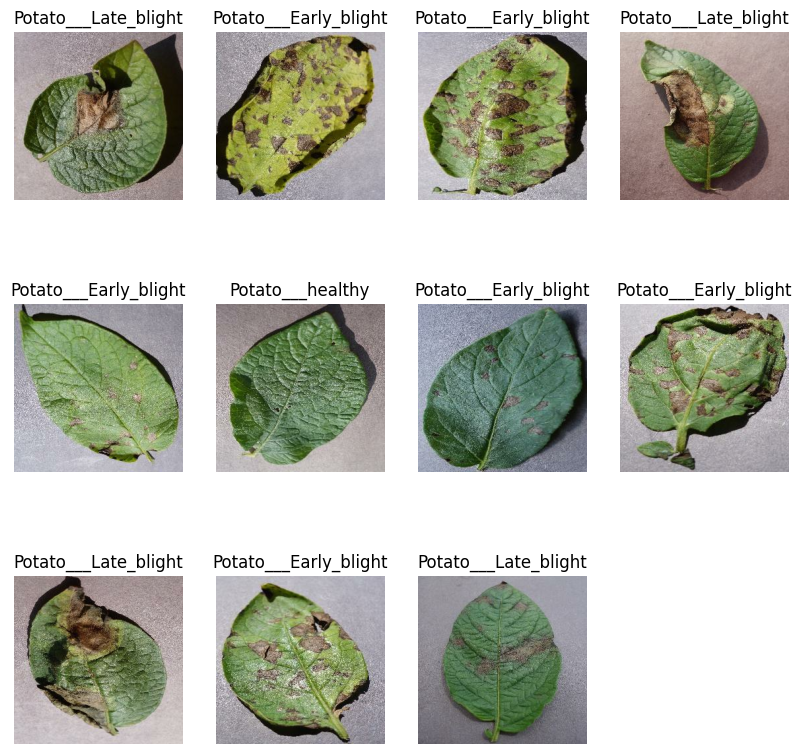

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(11):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

80%===> training
20%==> 10% validation 10% testing

In [8]:
def get_partitions(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return  train_ds,val_ds,test_ds

In [9]:
train_ds,val_ds,test_ds=get_partitions(dataset)

In [10]:
print(len(train_ds))
print(len(test_ds))
print(len(val_ds))

54
8
6


In [11]:
train_ds=train_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_and_scale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
    
    ])

In [13]:
data_augumentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [14]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_scale,
    data_augumentation,
    layers.Conv2D(40,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(66,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(66,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(66,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(66,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(66,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(66,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])
model.build(input_shape=input_shape)

C:\Users\vasan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 40)          │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 40)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 66)          │          23,826 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 66)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 66)            │          39,270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 66)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 66)            │          39,270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 66)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 66)            │          39,270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 66)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 66)              │          39,270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 66)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 264)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 66)                    │          17,490 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,717 (780.14 KB)

 Trainable params: 199,717 (780.14 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [17]:
history=model.fit(
    train_ds,
    epochs=25,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 243s 4s/step - accuracy: 0.4835 - loss: 0.9298 - val_accuracy: 0.5052 - val_loss: 0.8179
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.6320 - loss: 0.8082 - val_accuracy: 0.7865 - val_loss: 0.5325
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.7814 - loss: 0.5323 - val_accuracy: 0.8438 - val_loss: 0.3526
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8682 - loss: 0.3295 - val_accuracy: 0.8490 - val_loss: 0.3033
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8903 - loss: 0.2882 - val_accuracy: 0.9115 - val_loss: 0.2391
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9073 - loss: 0.2437 - val_accuracy: 0.9167 - val_loss: 0.1998
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9363 - loss: 0.1890 - val_accuracy: 0.9219 - val_loss: 0.1961
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9363 - loss: 0.1581 - val_accuracy: 0.9271 - val_los

In [18]:
score=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 374ms/step - accuracy: 0.9334 - loss: 0.1572


In [24]:
y_pred=model.predict(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 355ms/step


In [28]:
#print(y_pred)

In [29]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [35]:
print(len(y_pred_classes))

256


In [37]:
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_true_classes = np.argmax(y_true)

In [38]:
print(len(y_true))

256


In [40]:
print(y_true)

[1 1 0 0 1 0 0 0 0 1 0 2 1 2 0 0 0 1 1 1 1 1 2 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 2 0 0 0 0
 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 2 2 0 0 1 1 2 0 0 1 0
 2 0 1 0 0 1 1 0 0 2 1 0 1 1 0 0 2 0 0 0 1 1 0 0 0 1 0 0 1 0 0 2 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 2 1 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 2 1 1 0 0 0 0 0 2 1 2 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1
 0 2 2 0 0 1 1 1 0 1 1 2 1 2 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1]


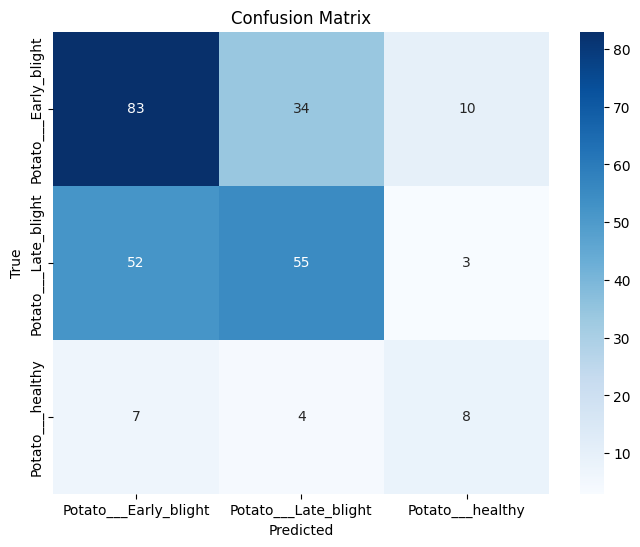

In [45]:
cm = confusion_matrix(y_true, y_pred_classes)



# Step 6: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 54}

In [21]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'TRAINING and VALIDATION ACCURACY')

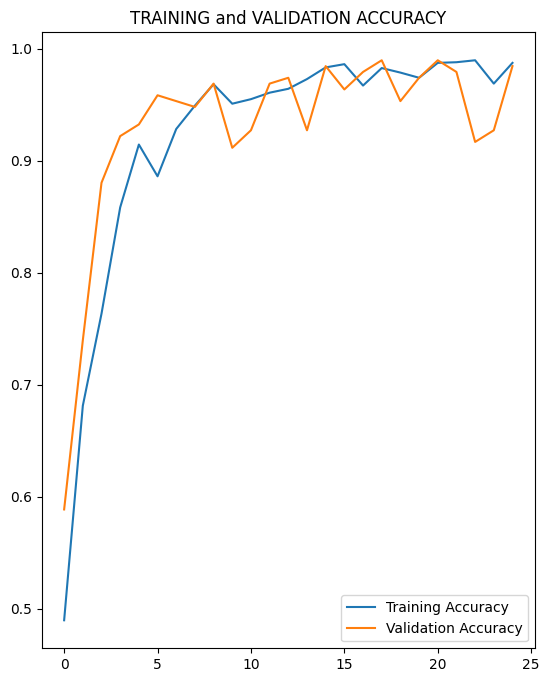

In [27]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(range(25),acc,label="Training Accuracy")
plt.plot(range(25),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("TRAINING and VALIDATION ACCURACY")

first image to predict
Actual label :  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Predicted label :  Potato___Late_blight


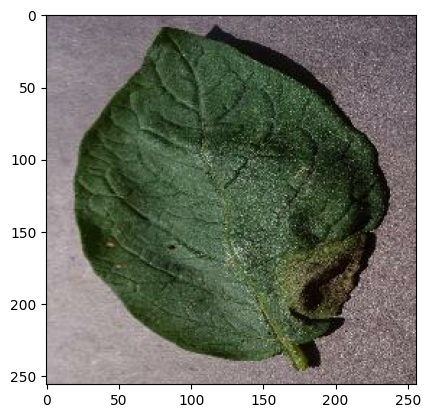

In [24]:
import numpy as np
for image_batch,labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype("uint8")
    first_label=labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label : ",class_names[first_label])
    batch_prediction=model.predict(image_batch)
    print("Predicted label : ",class_names[np.argmax(batch_prediction[0])])

In [25]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,0)#creating Batch
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


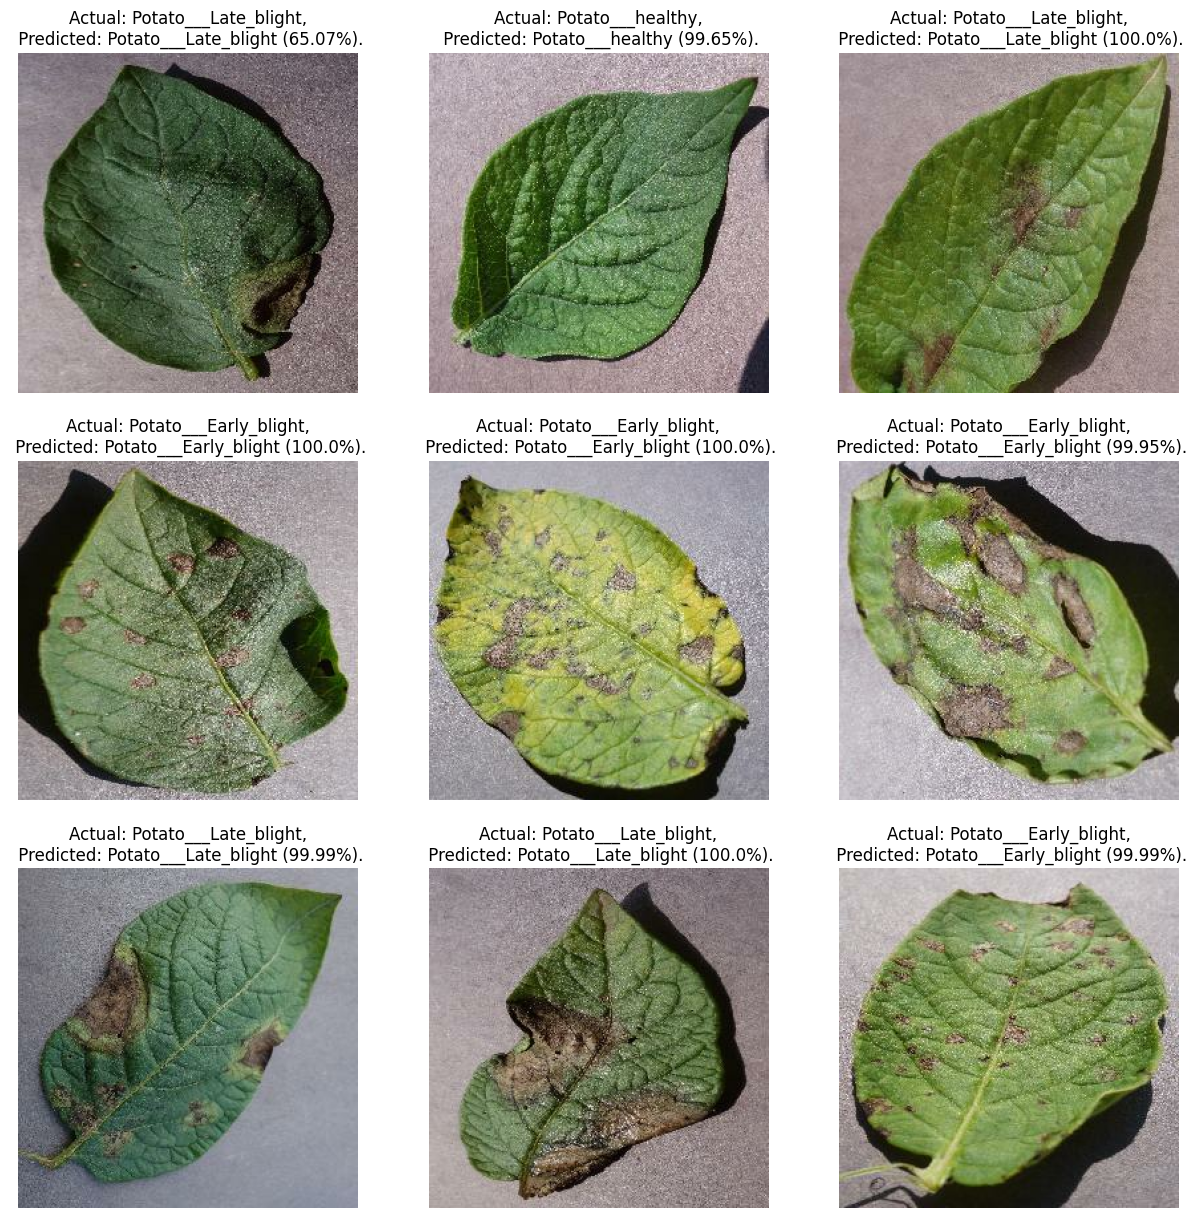

In [26]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class} ({confidence}%).")
        plt.axis("off")

In [29]:
import os

# Define the models directory
models_dir = "../models"

# Ensure the models directory exists
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Get the latest model version by considering only directories with integer names
model_version = max([int(i) for i in os.listdir(models_dir) if i.isdigit()] + [0]) + 1

# Save the model
model.save(f"{models_dir}/{model_version}.keras")

print(f"Model saved in {models_dir}/{model_version}")

Model saved in ../models/1


In [30]:
model.save(f"{models_dir}/{2}.keras")